# Mercedes araba verileri ile analiz

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn

In [3]:
dataFrame = pd.read_excel("merc.xlsx")

In [4]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
# null veri var mı bir bakmamız gerek. ya siler ya da ortalama bir rakamla doldurabiliriz.
dataFrame.isnull().sum() # sum ile burda toplam kaç rowda eksik var bize getirecek.

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

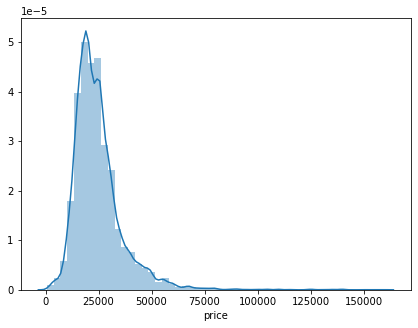

In [7]:
plt.figure(figsize = (7,5))
sbn.distplot(dataFrame["price"]) # distrubution plot = dağılım grafiği çizecek

In [8]:
# çok pahalı arabalar yüzünden grafik devam etmiş en sağa doğru, bizim ortalamamızı değiştiren 10 20 tane pahalı araba var gibi duruyor.
# iş hayatında hem bu halde hem aşırı pahalılar hariç denenip analiz edilmeli biz burda pahalı arabaları çıkarıp deniycez.

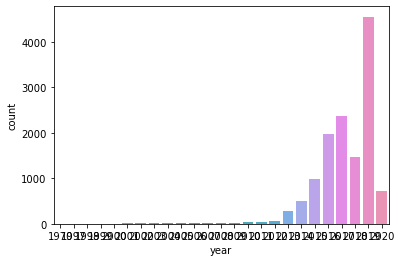

In [9]:
sbn.countplot(dataFrame["year"])

In [10]:
# veriler arasındaki korelasyon'a bakalım
dataFrame.corr()["price"].sort_values() # en negatif ilişkiden en pozitif ilişkiye dek sıralıyor

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [11]:
# demekki year ve enginesize, tax de verileri pozitif etkiliyor yani fiyatı arttırıyor.
# en negatif etkileyen arabanın kaç km olduğu ve kilometre başı yaktığı galon sayısının yüksek olması
# transmision değeri rakamsal değeri olmadığı için getirilmiyor, hesaplamaya da girmiyor.

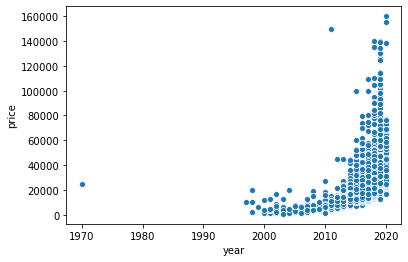

In [12]:
sbn.scatterplot(x = "year", y = "price", data=dataFrame)

In [13]:
dataFrame.sort_values("price", ascending = False).head(20) # ascending = en yüksek fiyatı en yukarıda getiricek false verdiğimden

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [14]:
dataFrame.sort_values("price", ascending = True).head(20) # ascending = yükselen demek

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [15]:
len(dataFrame)

13119

In [16]:
# %99 unu alalım verinin 

In [17]:
len(dataFrame) * 0.01 # en yüksek 131 fiyatlı arabayı bulalım ve atalım.

131.19

In [18]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("price", ascending = False).iloc[131:]

In [19]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


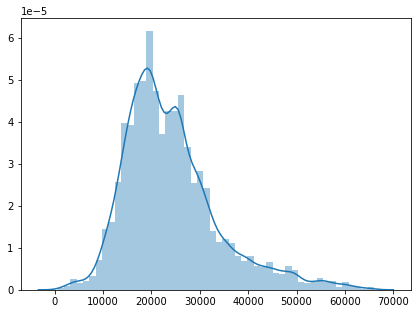

In [20]:
plt.figure(figsize=(7,5))
sbn.distplot([yuzdeDoksanDokuzDf["price"]])
# artık daha normal bir dağılım var elimizde

In [21]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [22]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]
# 1970 de 25 bin pounda satılıyor bu veriyi de çıkarabiliriz

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"] # burda desteklenen operasyon dataFrame.year

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [24]:
dataFrame = yuzdeDoksanDokuzDf

In [25]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [26]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [27]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [28]:
dataFrame.head() # transmission kolonunu da kaldıralım

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [29]:
dataFrame = dataFrame.drop("transmission", axis = 1)

In [30]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [31]:
y = dataFrame["price"].values
X = dataFrame.drop("price", axis=1).values # price hariç hepsini alıcak x

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

In [34]:
# scale edelim
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
X_train.shape # 5 adet feature var şu an

(9090, 5)

In [40]:
model = Sequential()

model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam",loss = "mse")

In [42]:
model.fit(x = X_train, y = y_train,validation_data = (X_test,y_test), batch_size = 250, epochs = 300)

Epoch 1/300
37/37 [==============================] - 5s 105ms/step - loss: 678981138.5263 - val_loss: 688059776.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 661351395.3684 - val_loss: 687938240.0000
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 673535705.2632 - val_loss: 687561856.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 667339627.7895 - val_loss: 686379968.0000
Epoch 5/300
37/37 [==============================] - 0s 5ms/step - loss: 666149650.5263 - val_loss: 683046912.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 675946736.8421 - val_loss: 675040768.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 652304003.3684 - val_loss: 658311040.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 639691090.5263 - val_loss: 627235200.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 60418

37/37 [==============================] - 0s 3ms/step - loss: 21570760.9474 - val_loss: 22655096.0000
Epoch 144/300
37/37 [==============================] - 0s 4ms/step - loss: 22740446.2105 - val_loss: 22591320.0000
Epoch 145/300
37/37 [==============================] - 0s 3ms/step - loss: 22027342.0000 - val_loss: 22532790.0000
Epoch 146/300
37/37 [==============================] - 0s 3ms/step - loss: 20877330.9474 - val_loss: 22521620.0000
Epoch 147/300
37/37 [==============================] - 0s 3ms/step - loss: 21375258.0526 - val_loss: 22435858.0000
Epoch 148/300
37/37 [==============================] - 0s 3ms/step - loss: 20997688.3684 - val_loss: 22387762.0000
Epoch 149/300
37/37 [==============================] - 0s 3ms/step - loss: 20991896.0526 - val_loss: 22342230.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 20788757.2105 - val_loss: 22298878.0000
Epoch 151/300
37/37 [==============================] - 0s 3ms/step - loss: 20077374.1579 - val

37/37 [==============================] - 0s 3ms/step - loss: 18807906.5263 - val_loss: 20302072.0000
Epoch 286/300
37/37 [==============================] - 0s 4ms/step - loss: 18709315.7895 - val_loss: 20280018.0000
Epoch 287/300
37/37 [==============================] - 0s 6ms/step - loss: 18370687.5789 - val_loss: 20260752.0000
Epoch 288/300
37/37 [==============================] - 0s 5ms/step - loss: 18254752.3158 - val_loss: 20252330.0000
Epoch 289/300
37/37 [==============================] - 0s 4ms/step - loss: 19119285.8947 - val_loss: 20242606.0000
Epoch 290/300
37/37 [==============================] - 0s 3ms/step - loss: 19632739.7895 - val_loss: 20261628.0000
Epoch 291/300
37/37 [==============================] - 0s 4ms/step - loss: 19133490.9474 - val_loss: 20244384.0000
Epoch 292/300
37/37 [==============================] - 0s 3ms/step - loss: 18403822.5263 - val_loss: 20256298.0000
Epoch 293/300
37/37 [==============================] - 0s 3ms/step - loss: 18780598.7895 - val

In [43]:
kayipVerisi = pd.DataFrame(model.history.history)

In [44]:
kayipVerisi.head()

,loss,val_loss
0,672121088.0,688059776.0
1,672048384.0,687938240.0
2,671832064.0,687561856.0
3,671151680.0,686379968.0
4,669126464.0,683046912.0


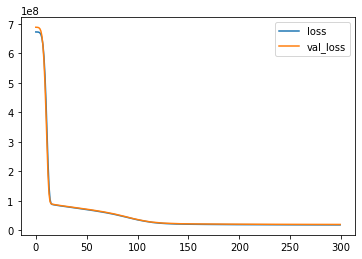

In [46]:
kayipVerisi.plot()
# grafik gayet iyi iki çizgide beraber, sıkıntı yok şu anlık

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
tahminDizisi = model.predict(X_test)

In [49]:
mean_absolute_error(y_test, tahminDizisi)

3215.1093595336883

In [50]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


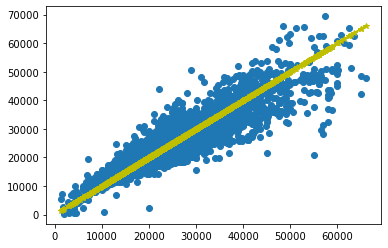

In [52]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test,"y-*")

In [ ]:
# deneme yapalım

In [54]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [57]:
yeniArabaSeries = dataFrame.drop("price", axis=1).iloc[2]

In [58]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [59]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [61]:
model.predict(yeniArabaSeries) # 65 bin dolara satılmış veriyi 63 bin tahmin etti modelimiz

array([[63666.527]], dtype=float32)